### Coviariance

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import pandas as pd

x = np.array(list(range(0,100,1)))
y = 7*x + np.random.normal(0,100,len(x))


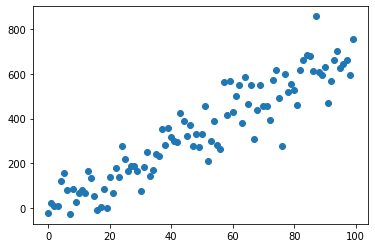

In [149]:
plt.scatter(x,y)

In [150]:
x_hat = (x-np.mean(x))/np.std(x)
y_hat = (y-np.mean(y))/np.std(y)

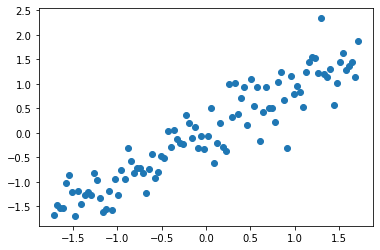

In [151]:
plt.scatter(x_hat,y_hat)

In [152]:
mean_x = np.mean(x)
mean_y = np.mean(y)

cov = np.mean((x-np.mean(x))*(y-np.mean(y))) 
cov

5875.372808091699

In [153]:
cor = np.mean((x_hat)*(y_hat))
cor

0.9304717577138422

In [154]:
np.corrcoef(x,y)

array([[1.        , 0.93047176],
       [0.93047176, 1.        ]])

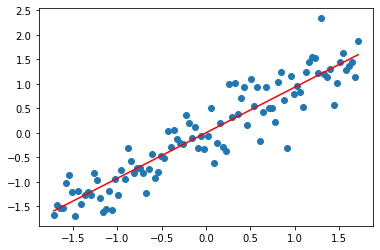

In [155]:
y_hat_reg =  x_hat*cor

plt.scatter(x_hat,y_hat)
plt.plot(x_hat,y_hat_reg,color = "red")

In [4]:
def compute_corr(x,y):
    x_hat = (x-np.mean(x))/np.std(x)
    y_hat = (y-np.mean(y))/np.std(y)
    cor = np.mean((x_hat)*(y_hat))
    return x_hat,y_hat,cor

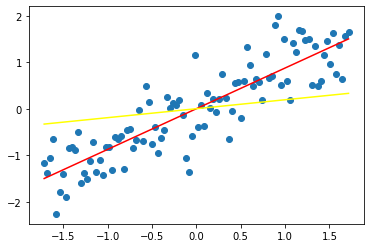

In [7]:
# add an outlier
x_hat,y_hat,cor = compute_corr(x,y)
y_hat_reg = x_hat*cor

y0_initial_value = y[0]
y[0] = -100000
x_hat_out,y_hat_out,corr_outlier = compute_corr(x,y)
y_hat_reg_out = x_hat*corr_outlier

y[0] = y0_initial_value


plt.scatter(x_hat,y_hat)
plt.plot(x_hat,y_hat_reg,color = "red")
plt.plot(x_hat,y_hat_reg_out,color = "yellow")

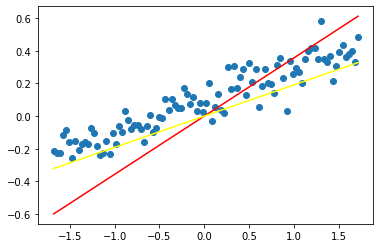

In [192]:

y0_initial_value = y[0]
y[0] = -10000
y_hat = (y-np.mean(y))/np.std(y)
cor = np.mean((x_hat)*(y_hat))

y_hat_reg =  x_hat*cor
cor_without_outliers = np.mean((x_hat)*(y_hat))
y_hat_reg_without_outliers =  x_hat*cor_without_outliers

plt.scatter(x_hat[1:],y_hat[1:])
plt.plot(x_hat,y_hat_reg,color = "red")
plt.plot(x_hat,y_hat_reg_without_outliers,color = "yellow")


In [77]:
import numpy as np
import matplotlib.pyplot as plt
x = np.random.uniform(-10,5,1000)
y = 1.1*x**2 + 5*x + np.random.normal(0,10,len(x)) + 10

In [78]:
x_hat,y_hat,cor =compute_corr(x,y)

In [79]:
slope = (np.std(y)*cor)/np.std(x)
intercept = np.mean(y) - slope*np.mean(x)

y_reg = x*slope + intercept

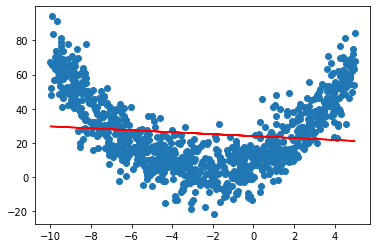

In [80]:
plt.scatter(x,y)
plt.plot(x,y_reg,color = "red")

In [82]:
residuals = y - y_reg

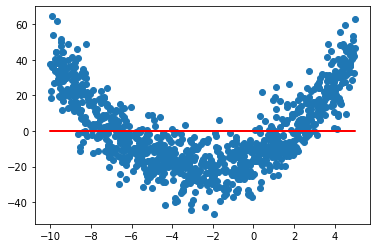

In [83]:
plt.scatter(x,residuals)
plt.plot(x,[0 for i in range(len(x))],color = "red")

In [84]:
_,_,cor_res =compute_corr(x,residuals)
cor_res

-1.7763568394002505e-18

In [86]:
math.sqrt(1-cor**2)*np.std(y)

21.381895675617272

In [87]:
np.std(residuals)

21.38189567561727

### Inference in regression

#### One variable

In [254]:
diabetes = datasets.load_diabetes()
X = diabetes.data[:,3]
y = diabetes.target

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     106.5
Date:                Sat, 03 Oct 2020   Prob (F-statistic):           1.65e-22
Time:                        00:08:53   Log-Likelihood:                -2499.3
No. Observations:                 442   AIC:                             5003.
Df Residuals:                     440   BIC:                             5011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      3.294     46.185      0.0

In [255]:
X_hat,y_hat,corr = compute_corr(X,y)
corr

0.44148384893088605

In [256]:
coef = (np.std(y) / np.std(X))*corr
coef

714.7416437042876

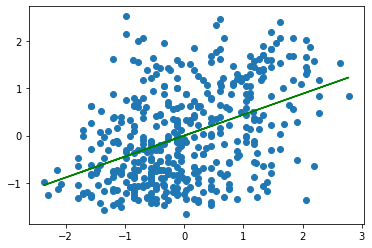

In [257]:
plt.scatter(X_hat,y_hat)
plt.plot(X_hat,X_hat*corr,color = "g")

In [258]:
def mae(y_true,y_pred):
    return np.mean(np.abs(y_true-y_pred))

def mse(y_true,y_pred):
    return math.sqrt(np.mean((y_true-y_pred)**2))

In [259]:
print(mae(y_hat,X_hat*corr))
print(mse(y_hat,X_hat*corr))

0.7416149722878386
0.8972691965810319


In [269]:
diabetes = datasets.load_diabetes()
X = diabetes.data[:,1]
y = diabetes.target

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8174
Date:                Sat, 03 Oct 2020   Prob (F-statistic):              0.366
Time:                        00:09:48   Log-Likelihood:                -2546.8
No. Observations:                 442   AIC:                             5098.
Df Residuals:                     440   BIC:                             5106.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      3.668     41.479      0.0

In [271]:
from sklearn.linear_model import LinearRegression
coefs = []
intercepts = []
for i in range(10000):
    indx = np.random.choice([i for i in range(len(X))],len(X),replace = True)
    lr = LinearRegression()
    if len(X.shape)==1:
        X = X.reshape(len(X),1)
    lr = lr.fit(X[indx],y[indx])
    coefs.append(lr.coef_)
    intercepts.append(lr.intercept_)
    
coefs= np.array(coefs)
intercepts= np.array(intercepts)

In [272]:
coef_ind = 0
coef = coefs[:,coef_ind]

In [273]:
def get_ci_p_value(dist):
    n_0025 = np.quantile(dist,0.025)
    n_975 = np.quantile(dist,0.975)
    p_value = 2*len(dist[dist<0]) / len(dist)
    return n_0025,n_975,p_value

(array([  21.,  178.,  750., 1897., 2964., 2545., 1234.,  345.,   61.,
           5.]),
 array([-209.81353232, -150.89910015,  -91.98466799,  -33.07023582,
          25.84419634,   84.75862851,  143.67306067,  202.58749284,
         261.501925  ,  320.41635717,  379.33078933]),
 <BarContainer object of 10 artists>)

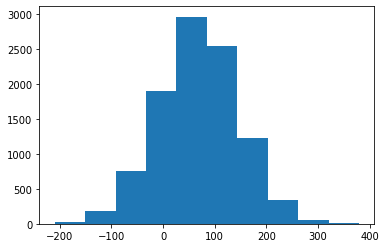

In [274]:
plt.hist(coef)

Confidence interval and p value of the coefficient:

In [275]:
get_ci_p_value(coef)

(-86.47730341557244, 218.54543860492888, 0.3654)

Standard error:

In [276]:
np.std(coef)

77.21814259562247

Confidence interval and p value of the intercept:

In [277]:
get_ci_p_value(intercepts)

(144.86561124222905, 159.27302105619373, 0.0)

In [278]:
np.std(intercepts)

3.6935347491654547

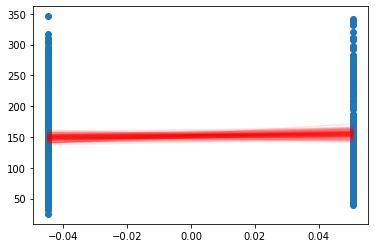

In [279]:
plt.scatter(X,y)
for i in range(100):
    plt.plot(X,X*coef[i] + intercepts[i],color = "r",alpha = 0.1)
    

Is it possible to get the coefficient of the variable from the standard error and the p-value?

In [280]:
std = 77.109
p_value = 0.366

We have n points:

In [281]:
n = len(X)
n

442

We know that the coefficient distribution follows a `N(mu(coef),std)` we also know that the cumulative function of this normal at 0 is `p_value / 2`:

Find this mu by performing a binary search:

In [282]:
left = 0
right = 10000
while right - left >0.001:
    mid = (left + right)/2
    area_under_0 = stats.norm.cdf(0,loc = mid,scale = std)
    if area_under_0>p_value/2:
        left = mid
    else:
        right = mid
        

In [283]:
mid

69.70584392547607

#### Multiple variables

In [295]:
X = boston.data[:,4:7]
y = boston.target

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     197.5
Date:                Sat, 03 Oct 2020   Prob (F-statistic):           1.42e-84
Time:                        00:11:26   Log-Likelihood:                -1643.0
No. Observations:                 506   AIC:                             3294.
Df Residuals:                     502   BIC:                             3311.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.0831      3.339     -5.715      0.0

What happens if we scale and center?

In [296]:
np.mean(X,axis = 0)

array([ 0.55469506,  6.28463439, 68.57490119])

In [297]:
np.std(X,axis = 0)

array([ 0.11576312,  0.70192251, 28.12103257])

In [345]:
X_norm = (X -np.mean(X,axis = 0)) / np.std(X,axis = 0)

In [364]:
X2 = sm.add_constant(X_norm)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     197.5
Date:                Sat, 03 Oct 2020   Prob (F-statistic):           1.42e-84
Time:                        00:22:14   Log-Likelihood:                -1643.0
No. Observations:                 506   AIC:                             3294.
Df Residuals:                     502   BIC:                             3311.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.278     81.134      0.0

In [363]:
X_norm_0 = X_norm[:2,:].copy()
X_norm_0[1,:] = X_norm_0[0,:].copy()
X_norm_0[1,0] = X_norm_0[1,0]*1.1

est2.predict(sm.add_constant(X_norm_0,has_constant = "add"))

array([25.22487171, 25.24570509])

In [359]:
sm.add_constant(X_norm_0)

array([[-0.14421743,  0.41367189, -0.12001342],
       [-0.14421743,  0.41367189, -0.12001342]])

In [365]:
X_norm_0

array([[-0.14421743,  0.41367189, -0.12001342],
       [-0.15863918,  0.41367189, -0.12001342]])